In [6]:
%reload_ext autoreload
%autoreload 2

import os, psutil
os.environ['NUMEXPR_MAX_THREADS'] = '20'
import logging
from alphadia.extraction import processlogger

from alphabase.spectral_library.base import SpecLibBase
from alphadia.extraction.planning import Plan

try:
    neptune_token = os.environ['NEPTUNE_TOKEN']
except KeyError:
    logging.warning('NEPTUNE_TOKEN environtment variable not set')
    neptune_token = None

0:05:35.392712  WARNING: NEPTUNE_TOKEN environtment variable not set


In [8]:

# spectral library location
# requires an alphabase spectral library with decoys
lib_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/libraries/patricia_hela/library_MSFragger.hdf'

# output location
# a file called alpha psm will be written to this location
output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_02_12_diaPASEF_vs_synchroPASEF'

raw_files = ['/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_SyP_classical_5bins_S2-A4_1_464.d']

processlogger.init_logging(output_location)

In [9]:
test_lib = SpecLibBase()
test_lib.load_hdf(lib_location, load_mod_seq=True)
test_lib._precursor_df['elution_group_idx'] = test_lib._precursor_df['precursor_idx']

0:00:09.363876  PROGRESS:       _   _      _         ___ ___   _   
0:00:09.364483  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:00:09.364955  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:00:09.365319  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:00:09.365828  PROGRESS:            |_|                            
0:00:09.366309  PROGRESS: 
0:00:09.366744  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default.yaml
0:00:09.372149  PROGRESS: version: 1.0.1
0:00:09.372646  PROGRESS: hostname: Georgs-MacBook-Pro.local
0:00:09.372978  PROGRESS: date: 2023-03-02 12:00:10
0:00:10.592836  INFO: renaming precursor_columns columns
0:00:10.594074  INFO: renaming fragment_columns columns
0:00:10.594543  INFO: ========= Library Stats =========
0:00:10.594954  INFO: Number of precursors: 104,110
0:00:10.608239  INFO: 	thereof targets:52,792
0:00:10.608868  INFO: 	thereof decoys: 51,318
0:00:10.610449  INFO

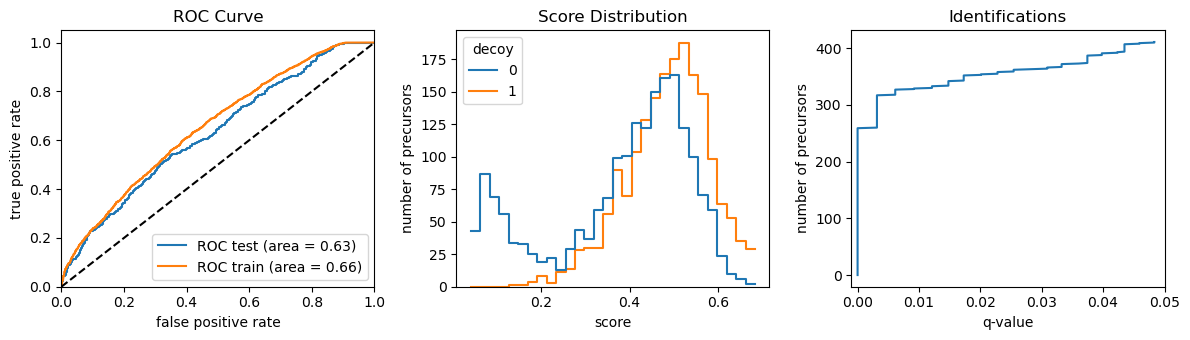

0:03:26.695397  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:03:26.696954  PROGRESS: Accumulated precursors: 3,794, 0.01 FDR: 330, 0.001 FDR: 260
0:03:26.697807  INFO: calibration group: precursor, fitting mz estimator 


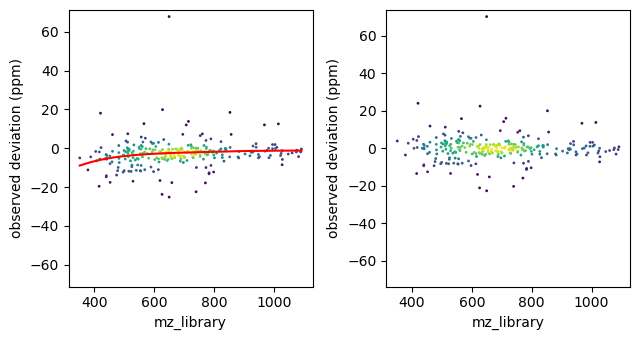

0:03:26.786966  INFO: calibration group: precursor, fitting rt estimator 


Too few datapoints per kernel. Uniform kernels will be replaced by density kernels.


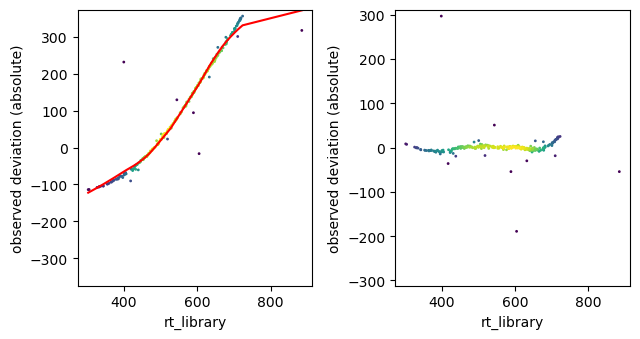

0:03:26.884644  INFO: calibration group: precursor, fitting mobility estimator 


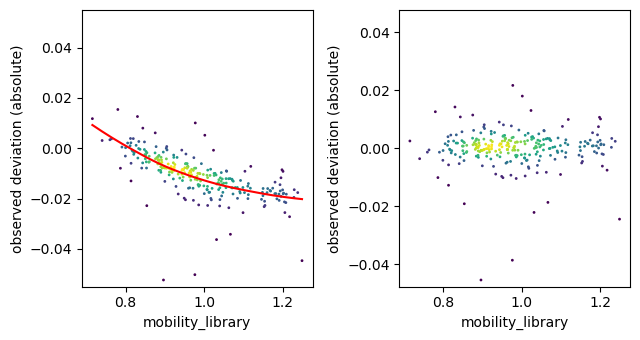

0:03:26.975098  INFO: calibration group: fragment, fitting mz estimator 


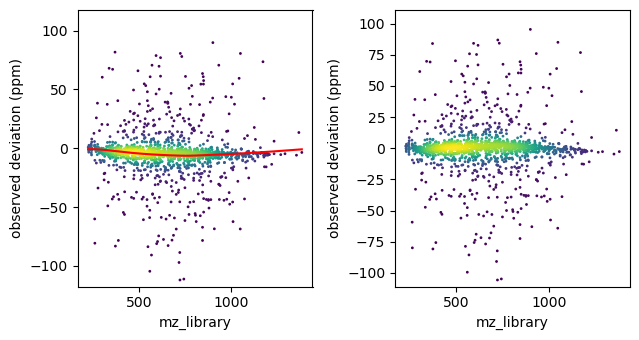

0:03:27.096480  INFO: calibration group: precursor, predicting mz
0:03:27.124604  INFO: calibration group: precursor, predicting rt
0:03:27.159414  INFO: calibration group: precursor, predicting mobility
0:03:27.174387  INFO: calibration group: fragment, predicting mz
0:03:27.297834  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:03:27.302309  PROGRESS: MS1 error: 15, MS2 error: 47.44927256836495, RT error: 30, Mobility error: 0.03
0:03:27.303647  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:03:27.304043  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:03:27.304379  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.91
0:03:27.304741  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7069/7069 [00:00<00:00, 12563.59it/s]
0:03:58.766544  INFO: Scored 7069 candidates
0:03:58.769628  INFO: 0.84% of targets failed, 1.27% of decoys failed
0:03:58.833739  INFO: number of dfs in featu

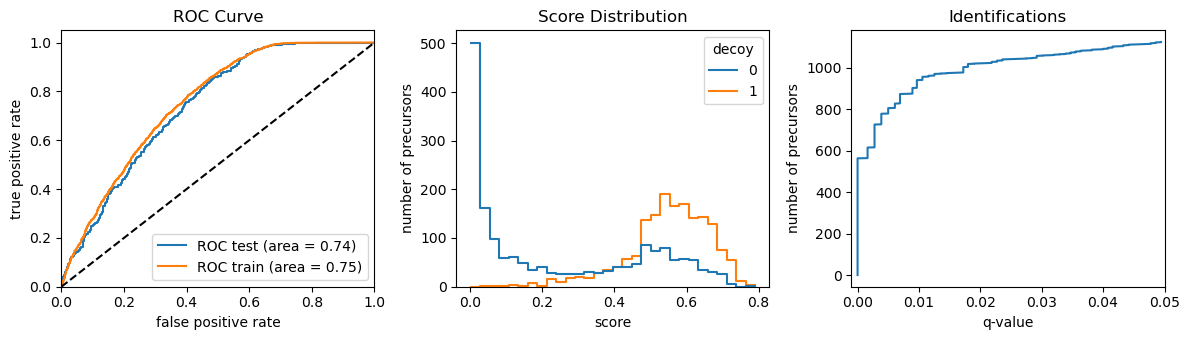

0:03:59.257109  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:03:59.257716  PROGRESS: Accumulated precursors: 3,521, 0.01 FDR: 941, 0.001 FDR: 564
0:03:59.258889  INFO: calibration group: precursor, fitting mz estimator 


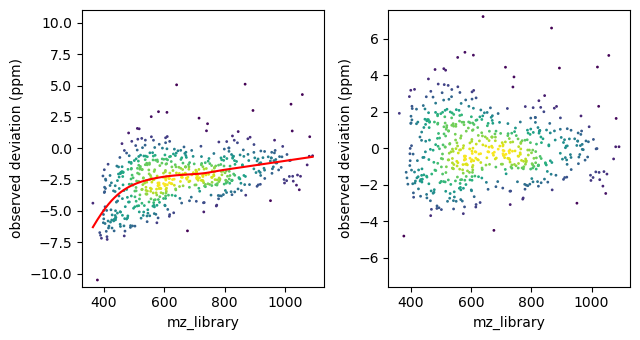

0:03:59.358348  INFO: calibration group: precursor, fitting rt estimator 


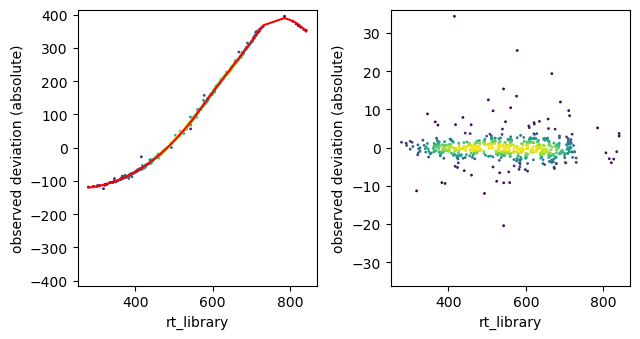

0:03:59.463131  INFO: calibration group: precursor, fitting mobility estimator 


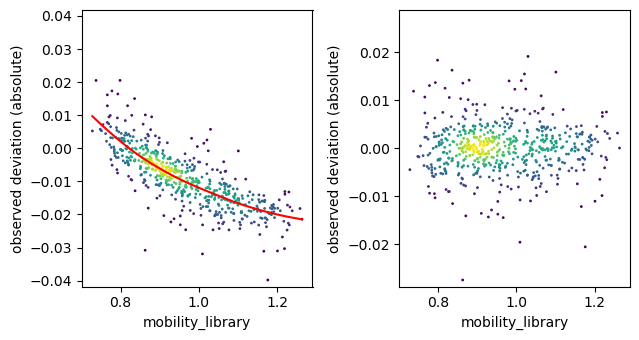

0:03:59.573223  INFO: calibration group: fragment, fitting mz estimator 


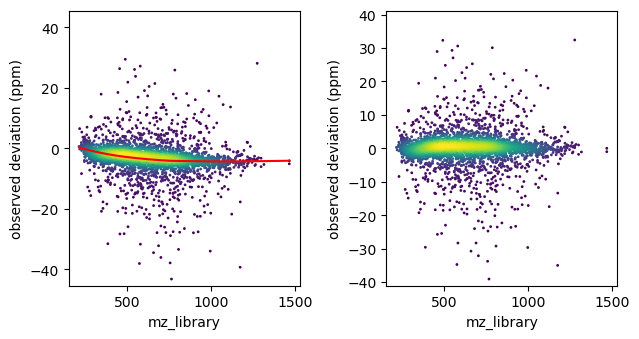

0:03:59.801219  INFO: calibration group: precursor, predicting mz
0:03:59.827486  INFO: calibration group: precursor, predicting rt
0:03:59.922242  INFO: calibration group: precursor, predicting mobility
0:03:59.997515  INFO: calibration group: fragment, predicting mz
0:04:00.275656  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:04:00.281031  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:04:00.282576  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:04:00.283052  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:04:00.283525  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.91
0:04:00.283871  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
 39%|███▉      | 1557/4000 [00:03<00:06, 395.29it/s]


KeyboardInterrupt: 

In [10]:
plan = Plan(raw_files)
plan.from_spec_lib_base(test_lib)
plan.run(output_location, neptune_token=neptune_token)